## pre load libs

In [4]:
%load_ext autoreload
%autoreload 2

from exp.janus_rl import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
## ML model
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.datasets import make_regression

import math
import pickle

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type,nb_features):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'][:nb_features], y=fi_df['feature_names'][:nb_features])
    #Add chart labels
    plt.title(model_type + ' - FEATURES IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

# Identify features from our ml predict model linked to sub-quality

In [5]:
sub_quality_range = (297, 324)

list_important_sub_quality = np.argsort(janus_env.ml_model.feature_importances_)[::-1]
list_important_sub_quality

list_important_features_real_column_names = [janus_env.full_x.columns[idx] for idx in list_important_sub_quality]
list_sub_quality_important_features_real_column_names = [qual for qual in list_important_features_real_column_names
                                                         if ( sub_quality_range[0] <= int(qual.split('_')[1]) <= sub_quality_range[1])]

In [6]:
list_sub_quality_important_features_real_column_names[:7]

['data_311',
 'data_299',
 'data_300',
 'data_323',
 'data_308',
 'data_310',
 'data_302']

I will focus arbitrarely on these 7 first features

# train a prediction model for these features

In [8]:



sub_quality_col = list_sub_quality_important_features_real_column_names[:7]


y_df = janus_env.full_x[sub_quality_col].copy()
x_df = janus_env.full_x.drop(columns=sub_quality_col).copy()

print('features shape: {}, \nsub quality targets shape: {}'.format(x_df.shape, y_df.shape))

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, random_state=14)
print('\nLength of train is {}, test is {}'.format(len(x_train), len(x_test)))

features shape: (13639, 221), 
sub quality targets shape: (13639, 7)

Length of train is 12275, test is 1364


In [9]:
## Model fitting

ml_model = RandomForestRegressor()   
ml_model.fit(x_train, y_train)

test_pred = ml_model.predict(x_test)

mse = mean_squared_error(y_test, test_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, test_pred)       

print('MSE: ', mse)
print('RMSE: ',rmse)
print('R-squared: ',r2)

MSE:  0.13184474934582263
RMSE:  0.36310432295116324
R-squared:  0.865271920442925


In [10]:
## ---- save/load the model to disk

## Random forest
filename = 'data/models/janus_stam_RF.pkl'  # janus_LinearReg, janus_RF

# pickle.dump(ml_model, open(filename, 'wb'))

# # load the model from disk
ml_model = pickle.load(open(filename, 'rb'))
print(f'R squared: {ml_model.score(x_test, y_test.values):0.04f}')


R squared: 0.8653


Check if we don't have too much sub quality inputs in feature importance

In [11]:
list_important_features = np.argsort(ml_model.feature_importances_)
list_important_features

array([188, 173, 177, 191, 180, 161, 165, 171, 153, 184, 157, 185, 172,
        41,  42,  35, 176, 198, 166, 164, 194,  40,  36,  68, 183, 158,
       160, 174, 155, 159, 192, 178, 162, 187, 189, 167, 181, 170, 186,
       151, 168,  58, 196, 175, 182, 197, 199,  95,  94, 150,  73, 154,
       195,  72,  56, 179, 193, 156,   0, 190, 211, 169, 127,  67,  63,
        59,  62,  60, 129,  55,  24,  31, 142, 220, 210, 126, 140, 128,
       144, 136,  49, 141,  96,   2, 147, 139,  21, 163, 135,  83, 148,
       149, 121,  90,  97,  11,  20, 119,  23,   7,   6, 111,   1,  17,
        84,  25,  13, 109,  69,  12,  92,  27, 117, 152,  91,  53,  29,
       134, 108, 112,  82,  18, 143, 131, 145,  43, 110,   4,  22,  61,
        98, 125, 101, 138,  33,  15,  85,  88, 133,  93, 115,  30,   5,
        64, 123, 132,   8,  86,  54,  10,  71,  26, 137, 118,  99,  16,
       106,   9, 120,  32, 146,  70, 105, 104,  77, 100,  65, 116, 103,
        57, 130, 107, 113,  79,  89,  14, 200,  78,   3,  66,  4

In [12]:
[janus_env.full_x.columns[idx] for idx in list_important_features]

['data_284',
 'data_257',
 'data_264',
 'data_287',
 'data_268',
 'data_240',
 'data_244',
 'data_254',
 'data_227',
 'data_275',
 'data_233',
 'data_276',
 'data_256',
 'data_45',
 'data_46',
 'data_39',
 'data_262',
 'data_295',
 'data_245',
 'data_243',
 'data_291',
 'data_44',
 'data_40',
 'data_72',
 'data_274',
 'data_234',
 'data_238',
 'data_258',
 'data_229',
 'data_235',
 'data_289',
 'data_266',
 'data_241',
 'data_278',
 'data_285',
 'data_248',
 'data_270',
 'data_252',
 'data_277',
 'data_225',
 'data_250',
 'data_62',
 'data_293',
 'data_261',
 'data_273',
 'data_294',
 'data_296',
 'data_104',
 'data_102',
 'data_224',
 'data_77',
 'data_228',
 'data_292',
 'data_76',
 'data_60',
 'data_267',
 'data_290',
 'data_232',
 'data_0',
 'data_286',
 'data_308',
 'data_251',
 'data_201',
 'data_71',
 'data_67',
 'data_63',
 'data_66',
 'data_64',
 'data_203',
 'data_59',
 'data_28',
 'data_35',
 'data_216',
 'data_317',
 'data_307',
 'data_200',
 'data_214',
 'data_202',
 'data

In [ ]:
import shap
explainer = shap.TreeExplainer(ml_model)
shap_values = explainer.shap_values(x_test)

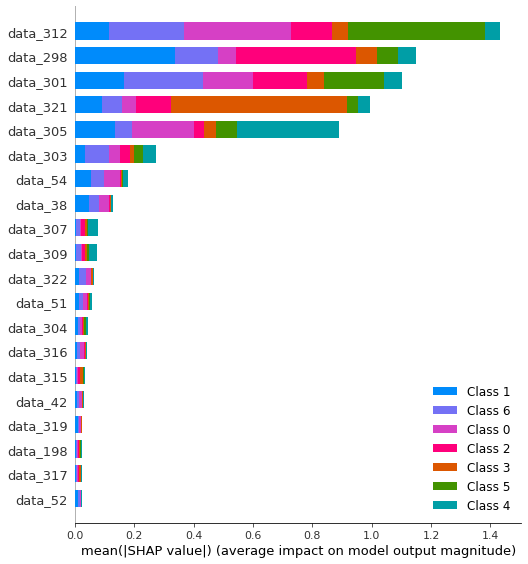

In [35]:
shap.summary_plot(shap_values, x_test)

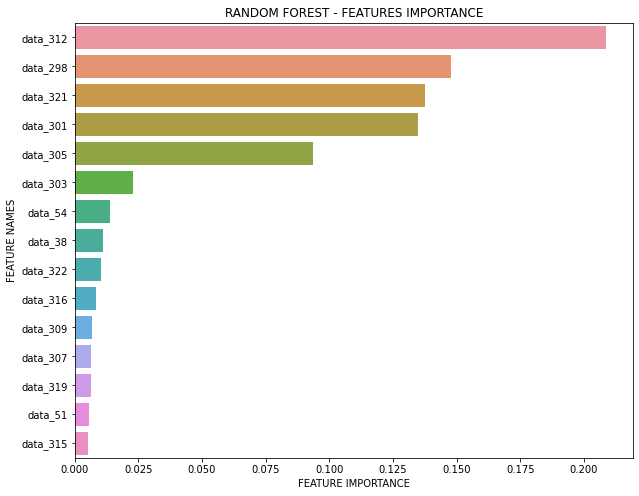

In [17]:
plot_feature_importance(ml_model.feature_importances_,x_df.columns,'RANDOM FOREST', 15)

# Retrain a model without any sub-quality data

In [23]:
sub_quality_range = (297, 324)
sub_quality_col = [qual for qual in janus_env.full_x.columns
                                                         if ( sub_quality_range[0] <= int(qual.split('_')[1]) <= sub_quality_range[1])]
sub_quality_col

['data_297',
 'data_298',
 'data_299',
 'data_300',
 'data_301',
 'data_302',
 'data_303',
 'data_304',
 'data_305',
 'data_306',
 'data_307',
 'data_308',
 'data_309',
 'data_310',
 'data_311',
 'data_312',
 'data_313',
 'data_314',
 'data_315',
 'data_316',
 'data_317',
 'data_318',
 'data_319',
 'data_320',
 'data_321',
 'data_322',
 'data_323',
 'data_324']

In [25]:
y_df = janus_env.full_x[sub_quality_col].copy()
x_df = janus_env.full_x.drop(columns=sub_quality_col).copy()

print('features shape: {}, \nsub quality targets shape: {}'.format(x_df.shape, y_df.shape))

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, random_state=14)
print('\nLength of train is {}, test is {}'.format(len(x_train), len(x_test)))

features shape: (13639, 200), 
sub quality targets shape: (13639, 28)

Length of train is 12275, test is 1364


In [26]:
## Model fitting

ml_model = RandomForestRegressor()   
ml_model.fit(x_train, y_train)

test_pred = ml_model.predict(x_test)

mse = mean_squared_error(y_test, test_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, test_pred)       

print('MSE: ', mse)
print('RMSE: ',rmse)
print('R-squared: ',r2)

MSE:  0.35144844550344395
RMSE:  0.5928308742832512
R-squared:  0.6956102388481462


In [27]:
## ---- save/load the model to disk

## Random forest
filename = 'data/models/janus_stam_RF.pkl'  # janus_LinearReg, janus_RF

# pickle.dump(ml_model, open(filename, 'wb'))

# # load the model from disk
ml_model = pickle.load(open(filename, 'rb'))
print(f'R squared: {ml_model.score(x_test, y_test.values):0.04f}')


R squared: 0.6956


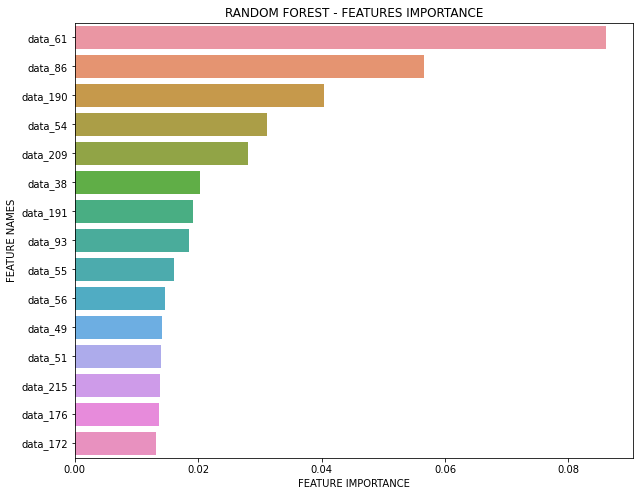

In [28]:
plot_feature_importance(ml_model.feature_importances_,x_df.columns,'RANDOM FOREST', 15)

In [31]:
janus_env = Janus(nbr_actions=6)

janus_env.full_x.columns[janus_env.list_important_actions]

features shape: (782, 228), 
targets shape: (782, 2)

Length of train is 703, test is 79
R squared: 0.6441
Output steps:  [0.064, 0.057]
Active reward function clown_hat


Index(['data_54', 'data_6', 'data_41', 'data_68', 'data_55', 'data_51'], dtype='object')